# Modelling patch-clamp experiments

In this set of notebooks, we look in detail at processing data obtained from patch-clamp experiments.

In particular, we focus on **manual** and **planar patch clamp** experiments in the **whole cell configuration**.
These can be used to either

1. pass current through the membrane and measure the resulting voltage (_current clamp_); or 
2. control the membrane voltage and measure the resulting current (_voltage clamp_).

We will focus exclusively on **voltage clamp**.
Our exposition will follow the excellent book chapter by [Sigworth 1995a](https://doi.org/10.1007/978-1-4419-1229-9_4) (although the parts we use here already appear in the [1983 edition](https://doi.org/10.1007/978-1-4615-7858-1_1)) as well as [Weerakoon et al., 2009](https://doi.org/10.1109/TBCAS.2008.2005419) and [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348).

In the first notebook, we introduce an electrical model of a patch-clamp set up and its imperfections.
In the second, we review a model of the common compensation circuitry used to counter these flaws.

## The basic set-up

Detailed descriptions of the patch clamp technique can be found in the chapter [Penner (1995) A Practical Guide to Patch Clamping](https://doi.org/10.1007/978-1-4419-1229-9_1), the (short) book [Molleman (2002) Patch Clamping](https://doi.org/10.1002/0470856521), or the (slightly older) article [Hamill, Marty et al., Sigworth (1981) Improved patch-clamp techniques for high-resolution current recording from cells and cell-free membrane patches](https://doi.org/10.1007/BF00656997).

In brief, a cell is placed in a bath containing an electrode (the _bath electrode_) and an ion-rich solution that can conduct electricity.
A patch clamp _pipette_ is constructed by pulling on a heated glass tube to form a sharp tip, then filling it with another ion-rich solution, and inserting an electrode into the open end.
The sharp end of the pipette is then placed against the cell membrane and suction, electric pulses, or chemicals are used to break the membrane inside the pipette opening, establishing an electrical connection to the inside of the cell.
A _patch clamp amplifier_ is attached to both electrodes, and can now be used to measure and manipulate the voltage between the bath and pipette electrodes.


## An electrical model of the patch-clamp set up

Now that we have access to the inside & outside of the cell, how can we control its voltage and measure the current?

An outline of the answer is given below.
We will assume some familiarity with passive electronics, but provide links to appendices for the more complicated parts.
Importantly, the schematics given here are _simplifications_, illustrating the principles of a patch-clamp amplifier but omitting real-life complications.

Figure 1 shows a very simple schematic to measure small currents.
A battery $V_c$ is attached to a pipette, and a resistor with a known resistance $R$ is introduced.
To obtain the current flowing into the patch clamp assembly, $I$, we measure the voltage drop $V_\text{out} = I R$ across the resistor and use

$$ I = V_\text{out} / R $$

<img src="resources/patch-amp-1-too-simple.png" style="margin:auto" />

_**Figure 1**: A very simple current measuring device (adapted from Sigworth 1995a)._

By choosing a large enough $R$ we get a measurable $V_\text{out}$ for even very small $I$.
However, a large $R$ also creates a big difference between the voltage we control, $V_c$, and the voltage over the patch clamp assembly.

A clever trick with an [op amp](https://en.wikipedia.org/wiki/Operational_amplifier) can get us around this:

<img src="resources/patch-amp-2-with-op-amp.png" />

_**Figure 2**: Using an op amp to measure small currents._

We analyse this circuit using two properties of **an idealised** op-amp:

1. Connected in a negative feedback loop like above, the op amp instantaneously adjusts its output $V_o$ until the voltages $V_+$ and $V_-$ at its input terminals are the same.
2. No current flows into or out of the input terminals.

From the first property we get $V_- = V_c$.
The second gives us $I = I_R$.
The voltage-drop across the resistor is then

$$ V_o - V_- = V_o - V_c = I_R R = I_ R $$

And so if we can measure $V_\text{out} \equiv V_o - V_c$ we can use the known value of $R$ to calculate

$$I = V_\text{out} / R$$

Finally, we add a [difference amplifier](https://en.wikipedia.org/wiki/Differential_amplifier) to $V_o$ and $V_c$.
A difference amplifier takes the voltage between its two inputs and multiplies it by a fixed factor, using an external power source.
Here we use an amplification factor of 1 so that it acts as a simple _buffer_.
This means that the power drawn from $V_{out}$ by any connected measurement equipment will be provided by the amplifier's power source and not by the circuit we are trying to measure.

Like with the op amp, we will assume that no (or negligible) current flows into the difference amplifier.

<img src="resources/patch-amp-3-diff-amp.png" style="margin:auto" />

_**Figure 3**: A difference amplifier buffers $V_{out}$._

For more about op amps and difference amplifiers, see [Appendix A](./appendix-A-op-amp.ipynb).

### "Stray" capacitance

We now make the schematic a bit more realistic, by adding a capacitor in parallel with the resistance.
In some schematics, this capacitor is drawn with dotted lines, to indicate that it represents the "stray" or "parasitic" capacitance of the resistor.
However, in newer designs resistors with a very low stray capacitance are used [(Weerakoon et al., 2009)](https://doi.org/10.1109/TBCAS.2008.2005419) but an extra capacitor is stil added to the circuit to "make the trans-impedance amplifier stable and to increase the bandwidth of the voltage clamp".
The stability argument is discussed in detail in [Sigworth 1995a](https://doi.org/10.1007/978-1-4419-1229-9_4).

<img src="resources/patch-amp-4-Cf.png" />

_**Figure 4**: A stray capacitance exists in parallel with the feedback resistor._

Because the resistance and capacitance are both in the feedback path of the op amp, we will label the resistance and its capacitance with a small f, for "feedback". We can redo the analysis with $C_f$ in place, to see how it affects $V_{out}$. 

Because there are now two pathways for the current to flow through we start from:

\begin{align}
I &= I_R + I_C \\
  &= (V_o - V_-) / R_f + C_f \frac{d}{dt}\left(V_o - V_-\right) \\
  &= V_\text{out} / R_f + C_f \dot{V}_\text{out} \\
R_f I &= V_\text{out} + R_f C_f \dot{V}_\text{out} \\
\end{align}

To allow for the idea that the current we calculate is no longer equal to $I$, we introduce a new symbol

\begin{align}
I_\text{obs} \equiv V_\text{out} / R_f
\end{align}

substituting this in we find

\begin{align}
I = I_\text{obs} + R_f C_f \dot{I}_\text{obs}
\end{align}
or
\begin{align}
\dot{I}_\text{obs} = \frac{I - I_\text{obs}}{\tau_f}
\end{align}

This means that $I_\text{obs}$ will follow $I$ with a time constant $\tau_f = R_f C_f$.
Typical values for $R_f$ and $C_f$ are given in [Appendix B](./appendix-B-Rf-and-Cf.ipynb).
For whole-cell experiments with standard gain settings, you might expect a $\tau_f$ on the order of $80\,{\mu}s$ (HEKA) to $500\,{\mu}s$ (Axon).

### Pipette/Parasitic capacitance

We now extend our diagram with another capacitor, $C_p$, to represent the "pipette capacitance".

In manual patch clamp, the submerged part of the pipette will act as a capacitor (for a detailed description, see [Levis & Rae 1998](https://doi.org/10.1016/S0076-6879(98)93017-8)).
The value of $C_p$ depends on the tip shape and wall thickness of the (home made) pipette, and on how much of it is immersed.
As a result, $C_p$ will vary between experiments.
During an experiment, changes in the water level due to evaporation and/or perfusion as well as adhesion effects (water slowly creeping up the side of the pipette) can cause further variation (see e.g. [Thompson et al. 2001](https://doi.org/10.1016/S0006-3495(01)75752-9)).

However, there are other capacitative effects in the set-up, and a considerable $C_p$ exists in pipette-free patch clamp methods such as planar patch.
So it is better to think of $C_p$ as a lumped, _parasitic_ capacitance.

<img src="resources/patch-amp-5-Cp.png" />

_**Figure 5**: The pipette, or lumped parasitic capacitance.
We have renamed $V_-$ to $V_p$, as we will use $V_p$ and $C_p$ together in the equations._

With this our equation for the observed current becomes
\begin{align}
\dot{I}_\text{obs} = \frac{I + C_p \dot{V}_p - I_\text{obs}}{\tau_f}
\end{align}


### A finite op amp speed

Using the ideal op-amp assumptions, we have $V_p = V_c$ and $\dot{V}_p = \dot{V}_c$, so the new term is entirely dependent on our input signal for $V_c$.
For a step protocol, a common choice in voltage clamping, this would imply that $\dot{V}_p$ is either 0 during the steps or infinity at the discontinuities.
To get a more realistic result, we have to assume the op amp makes $C_p$ follow $C_v$ with a finite speed.

Two equations for this are found in the literature.
[Sigworth 1995a](https://doi.org/10.1007/978-1-4419-1229-9_4) uses

$$ \dot{V}_o = \frac{V_c - V_p}{\tau_a} $$

where $\tau_a$ is tens of nanoseconds.
The later work by [Weerakoon et al., 2009](https://doi.org/10.1109/TBCAS.2008.2005419) and then [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348) uses

\begin{align}
\dot{V}_p = \frac{V_c - V_p}{\tau_c}, \quad
\tau_c = \frac{C_f + C_p}{C_f} \tau_a
\end{align}

Typical values for $\tau_a$ are in the order of 10 to 100 ns, as given in [Appendix C](./appendix-C-tau-amp.ipynb).

A detailed analysis of the amplifier's "bandwidth", used as a measure for how fast the amplifier can respond to changes in $V_c$, is given in Sigworth 1995a.
It involves transfer function representations, which are discussed in [Appendix D](./appendix-D-laplace-and-filters.ipynb), while parts of the analysis are recapitulated in [Appendix E](./appendix-E-non-ideal-op-amp.ipynb).
In summary, the equations used by Weerakoon and Lei et al. are a simplification based on Sigworth's analysis.
They give rise to slightly different behaviour, as can be seen in [Appendix F](./appendix-F-uncompensated-models.ipynb), but for the analysis of many patch-clamp experiments their influence is overshadowed by the effects of the _series resistance_ and _membrane capacitance_, which are discussed below.

### Series resistance and membrane capacitance

Finally, we add the cell itself to our model circuit.

<img src="resources/patch-amp-6-cell.png" />

_**Figure 6**: Series resistance, membrane capacitance, and a mysterious cell._

Our connection to the cell's cytosol is characterised by a _series resistance_ $R_s$.
And just like $C_p$, which is best thought of as a lumping together of several capacitances, $R_s$ represents the sum effect of all resistances between the amplifier and the cytosol.

To represent the potential between the inside of the cell and the ground, we'll use the symbol $V_m$.
By assuming that the bath liquid is well grounded we can equate this to the membrane potential, defined as $V_m = V_\text{in} - V_\text{out}$.

Finally, we separate the current of interest, $I$, from the current needed to charge the membrane which we represent as a capacitor $C_m$.
Because we don't want to make any assumptions about the mechanisms giving rise to $I$, we've drawn it as a mysterious little cloud.

As before, we can write equations corresponding to these electrical components.
For example, the current passing through $R_s$ is proportional to voltage drop $V_p - V_m$, and equals the sum of currents passing through the cell:

$$ \frac{V_p - V_m}{R_s} = C_m \dot{V}_m + I $$

### Voltage offsets

Voltage offsets arise at various locations in the set-up, including inside the amplifier (\~30mV), at the interface between electrodes and liquids (up to 100mV), and at liquid interfaces (\~15mV, all estimates are from [Neher, 1995](https://doi.org/10.1007/978-1-4419-1229-9_6)).
These offsets are typically "zeroed out" before an experiment is started (as will be discussed in the next notebook) but for now we will include them by adding a battery representing an offset $E_\text{off}$.

<img src="resources/patch-amp-7-Eoff.png" />

_**Figure 7**: A battery is added, representing the sum of the various voltage offsets and corrections._

Because we assume that all of the components are _linear_ (so that their behaviour depends on voltage differences instead of absolute values), we have some freedom in where we place the battery in the schematic.*
In particular, when we discuss errors in the $E_\text{off}$ correction in the next notebook, we will assume it is corrected at the same location.

(*I think! Haven't checked this)

### Leak current

To complete the circuit we add a leak current, indicated as a resistance $R_\text{leak}$ (usually expressed as $g_\text{leak} = 1 / R_\text{leak}$) and an offset $E_\text{leak}$.

<img src="resources/patch-amp-8-Ileak.png" />

_**Figure 8**: A leak current is added, including a voltage offset._

Here we have followed [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348) in placing the leak current after the series resistance, and in direct connection with the potential inside the membrane $V_m$.
This placement assumes assumes that the bulk of the series resistance $R_s$ is encountered before the pipette tip, so that threre is negligible resistance between the point from which current escapes ("leaks") and the cell internals.

By modelling the leak current as a simple resistor, we are also assuming linear leak.
This assumption can be invalidated if calcium fluoride patch enhancer is used ([Lei et al. (2021)](https://doi.org/10.12688/wellcomeopenres.15968.2)).

Finally, we have added a battery representing an offset $E_\text{leak}$, which assumes that the leak current has a non-zero reversal potential.
This is not expected from first principles, as a non-selective leak current should have a reversal potential $E_\text{leak} = 0$.
Indeed, a simple experiment can be performed by running a patch clamp protocol before attaching to a cell, and this does show reversal at 0mV.
Yet, in our experience a non-zero $E$ does seem to crop up when analysing patch-clamp data, so we will leave $E_\text{leak}$ in for the time being.

Accepting these three assumptions, the equation for the leak current becomes:

$$I_\text{leak} = \frac{V_m - E_\text{leak}}{R_\text{leak}} = g_\text{leak}\left(V_m - E_\text{leak}\right)$$

These considerations show that, despite its (presumed) simple nature, leak (or apparent leak) is not fully understood.
Indeed, separating leak from endogeneous or otherwise unexpected currents present in the cell of interest is non-trivial, and we offer no solution in this notebook.

## An ODE model of uncompensated patch-clamp

We are now in a position to formulate an ODE model of the _uncompensated_ patch-clamp set-up.
In the next notebook we will extend this model with compensation terms for the effects of $E_\text{off}$, $C_p$, $C_m$, and $R_s$.

<img src="resources/patch-amp-8-Ileak.png" />

_**Figure 8 again**: A model of uncompensated whole-cell voltage-clamp._

We can use the sum of currents at the $V_m$ node to write a differential equation:

\begin{align}
1.1. && C_m\dot{V}_m = \frac{V_p + E_\text{off} - V_m}{R_s} - \frac{V_m - E_\text{leak}}{R_\text{leak}} - I
\end{align}

If we solve this as an [initial value problem](https://en.wikipedia.org/wiki/Initial_value_problem) (i.e. a simulation), then the only unknown variable is $V_p$.
To find an ODE for it, we inspect the sum of currents at the $V_p$ node:

\begin{align}
C_p\dot{V}_p = \frac{V_o - V_p}{R_f} + C_f(\dot{V}_o - \dot{V}_p) - \frac{V_p + E_\text{off} - V_m}{R_s}
\end{align}
so that
\begin{align}
1.2. && (C_p+C_f)\dot{V}_p = \frac{V_o - V_p}{R_f} + C_f\dot{V}_o  - \frac{V_p + E_\text{off} - V_m}{R_s}
\end{align}

Now we need to know $V_o$ and $\dot{V}_o$, for which we use the equation given by Sigworth:

\begin{align}
1.3. && \dot{V}_o = \frac{V_c - V_p}{\tau_a}
\end{align}

And finally we write an equation for the observed current:

\begin{align}
1.4. && I_\text{obs} = \frac{V_o - V_c}{R_f}
\end{align}

This gives us a 3 state variable ODE model of the patch-clamp set-up without compensation.

The model above differs subtly from the uncompensated model used in [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348).
A comparison is provided in [Appendix F](./appendix-F-uncompensated-models.ipynb).

## Names & symbols

A list of alternative names and symbols for the components above is given in [Appendix G](./appendix-G-symbols.ipynb).

Notably $R_\text{leak}$ is often called _seal resistance_, while $R_s$ is also referred to as _access resistance_.

## Simulations

We can use Myokit to run simulations with the uncompensated patch-clamp model.

We will set the current of interest, $I$, to 0, so that everything you see in the simulations is expirimental "artefact".
Instead of applying a voltage protocol, we will implement a single voltage step through the initial conditions:

1. The command voltage is set to a fixed value Vc = -20
2. The initial membrane potential is set to Vm = -80
3. We leave out $E_\text{off}$ and $I_\text{leak}$, and set $I = 0$ (for now), leaving only the capacitative currents. As a result, at steady state we have $V_p = V_o = V_m$.

The parameters used here are representitative of a small-cell experiment, and are motivated in [appendix N](./appendix-N-parameter-values.ipynb).

In [1]:
import myokit
import matplotlib.pyplot as plt

In [2]:
m = myokit.parse_model('''
[[model]]
amp.Vm = 0
amp.Vp = 0
amp.Vo = 0

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
I = 0 [pA] in [pA]
Rs = 15e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cp = 5 [pF] in [pF]
Rf = 0.5 [GOhm] in [GOhm]
Cf = 0.15 [pF] in [pF]
tau_amp = 20e-6 [ms] in [ms]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm
    in [mV]
dot(Vp) = ((Vo - Vp) / Rf + Cf * dot(Vo) - (Vp - Vm) / Rs) / (Cf + Cp)
    in [mV]
dot(Vo) = (Vc - Vp) / tau_amp
    in [mV]
I_obs = (Vo - Vc) / Rf
    in [pA]
''')
m.check_units(myokit.UNIT_STRICT)

In [3]:
p = myokit.Protocol()
p.add_step(level=0, duration=5)
p.add_step(level=10, duration=10)
p.add_step(level=0, duration=20)

s = myokit.Simulation(m, p)
s.pre(4)
d = s.run(20)

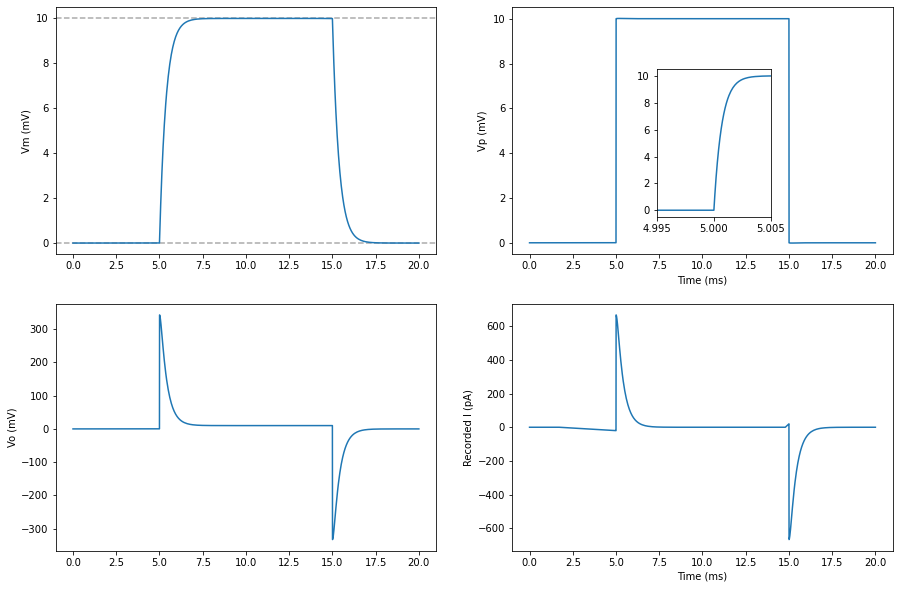

In [4]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_ylabel('Vm (mV)')
kw = dict(color='#aaa', ls='--')
ax.axhline(0, **kw)
ax.axhline(10, **kw)
ax.plot(d.time(), d['amp.Vm'])

ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vp (mV)')
ax.plot(d.time(), d['amp.Vp'])
ins = ax.inset_axes((0.38, 0.15, 0.3, 0.6))
ins.plot(d.time(), d['amp.Vp'])
ins.set_xlim(4.995, 5.005)

ax = fig.add_subplot(2, 2, 3)
ax.set_ylabel('Vo (mV)')
ax.plot(d.time(), d['amp.Vo'])

ax = fig.add_subplot(2, 2, 4)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Recorded I (pA)')
ax.plot(d.time(), d['amp.I_obs'])

plt.show()

Top-left, we can see $V_m$ approach the desired voltage quite slowly, due to the large time constant $R_sC_m$.
Top-right, we see that the voltage $V_p$ approaches the target value much faster.
Bottom-left, the slow charging process is visible in $V_o$ and, with these parameters, obscures the effect of $C_p$.
Finally, bottom-right we see the recorded current, dominated by the large "slow capacitance" artefacts.

We can also see a strange "ramp" in $I_\text{obs}$ just before the voltage change.
This is a plotting artefact, and can be dealt with in different ways:

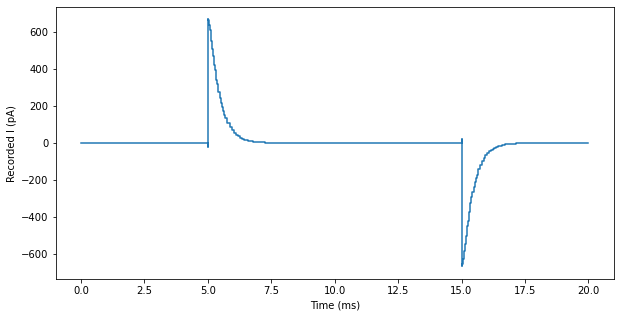

In [5]:
# Solution one: plotting without interpolation, but with "holding" the last value
# until the next one in the time series

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Recorded I (pA)')
ax.plot(d.time(), d['amp.I_obs'], ds='steps-post')
plt.show()

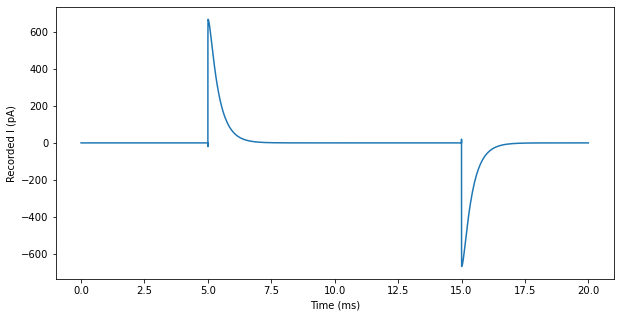

In [6]:
# Solution two: forcing the simulator to log a time point just before the discontinuities

s = myokit.Simulation(m, p)
s.pre(4)
d = s.run(4.9999)
d = s.run(10, log=d)
d = s.run(5.0001, log=d)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Recorded I (pA)')
ax.plot(d.time(), d['amp.I_obs'])
plt.show()

Next, we'll look at the membrane potential in the presence of a constant ionic current.

In [7]:
s.reset()
s.set_constant('amp.I', 100)
s.pre(4)
d = s.run(4.9999)
d = s.run(10, log=d)
d = s.run(5.0001, log=d)

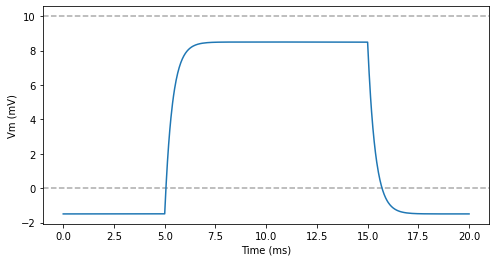

In [8]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
kw = dict(color='#aaa', ls='--')
ax.axhline(0, **kw)
ax.axhline(10, **kw)
ax.plot(d.time(), d['amp.Vm'])

plt.show()

Here we can see that $V_m$ doesn't quite reach $V_c$, due to the voltage drop over the series resistance $R_s$.

But it also doesn't start off at $V_c$, which is perhaps a bit unrealistic.
Because we modelled the current as constant, it causes a voltage drop over $R_s$ _regardless of the membrane potential_.
We can replace this by a more likely situation, where there is a current proportional to $V_m$:

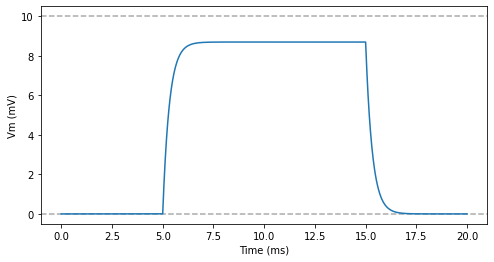

In [9]:
m.get('amp.I').set_rhs('Vm * 10 [pA/mV]')
s = myokit.Simulation(m, p)
s.pre(4)
d = s.run(4.9999)
d = s.run(10, log=d)
d = s.run(5.0001, log=d)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
kw = dict(color='#aaa', ls='--')
ax.axhline(0, **kw)
ax.axhline(10, **kw)
ax.plot(d.time(), d['amp.Vm'])
plt.show()

## Conclusion

We have presented a step-by-step derivation of an electrical schematic that can be used as a model of the distortions incurred during whole-cell planar or manual patch-clamp experiments.
The schematic contains mostly passive components (resistors, capacitors, batteries) as well as two active components (an op-amp and a difference amplifier) and a mystery component (the non-capacitative currents through the cell membrane).
A simple 3-ODE model can be derived from the schematic, similar to the one presented in [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348).

In the [next notebook](./artefacts-2-compensation.ipynb) we will add in equations representing the various types of _compensation_ electronics typically found on patch-clamp amplifiers, including fast and slow capacitative transient cancellation and series resistance compensation.